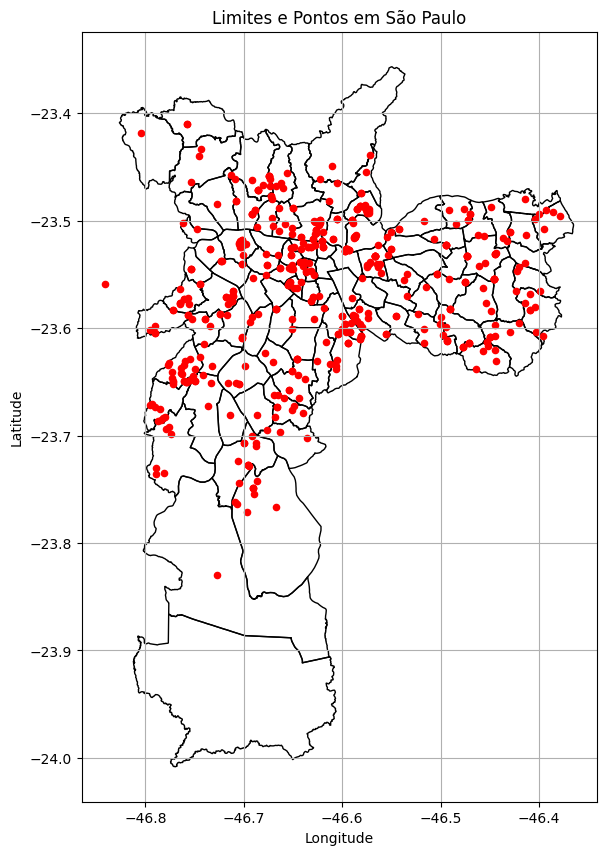

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Caminhos dos arquivos
geojson_path = "EPSG4326-DistritosSP.geojson"  # Substitua pelo nome do seu arquivo

# Carrega o arquivo GeoJSON com os limites e distritos
limites = gpd.read_file(geojson_path)

df = pd.read_excel('Geral.xlsx', sheet_name='Tabela Geral')
df['Coordenada X'] = pd.to_numeric(df['Coordenada X'], errors='coerce')
df['Coordenada Y'] = pd.to_numeric(df['Coordenada Y'], errors='coerce')
df = df.dropna(subset=['Coordenada X', 'Coordenada Y'])

# Cria uma GeoDataFrame a partir dos pontos
geometry = [Point(xy) for xy in zip(df['Coordenada X'], df['Coordenada Y'])]
gdf_pontos = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Plotagem
fig, ax = plt.subplots(figsize=(10, 10))
limites.plot(ax=ax, edgecolor='black', facecolor='none')
gdf_pontos.plot(ax=ax, color='red', markersize=20)

# Configurações visuais
plt.title("Limites e Pontos em São Paulo")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
